In [14]:
import pandas as pd
from forecaster import Forecaster
from xgboost import XGBRegressor

In [15]:
df = pd.read_csv('PJME.csv')
df.head()

,Datetime,PJME_MW
0,2011-03-01 00:00:00,27845.0
1,2011-03-01 01:00:00,26516.0
2,2011-03-01 02:00:00,25968.0
3,2011-03-01 03:00:00,25927.0
4,2011-03-01 04:00:00,26225.0


In [16]:
model = Forecaster(
    df,
    x = 'Datetime',
    y = 'PJME_MW'
)

In [17]:
model.make_future_dataframe(periods=5000)
model.df.tail()

,Datetime,PJME_MW
6460,2011-11-25 04:00:00,NaN
6461,2011-11-25 05:00:00,NaN
6462,2011-11-25 06:00:00,NaN
6463,2011-11-25 07:00:00,NaN
6464,2011-11-25 08:00:00,NaN


  0%|          | 0/440 [00:00<?, ?it/s]

,Training score,Test score
XGBRegressor,0.000174,0.059894


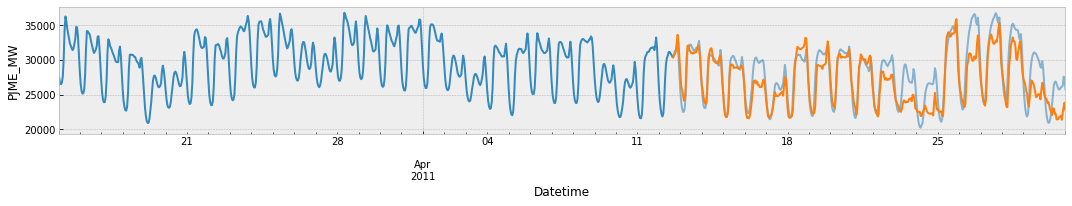

In [18]:
from sklearn.linear_model import Ridge
y_valid, scores = model.validate(XGBRegressor, seasonality = True, lag = True, plot = True)

  0%|          | 0/5001 [00:00<?, ?it/s]

,Training score
Ridge,0.004818


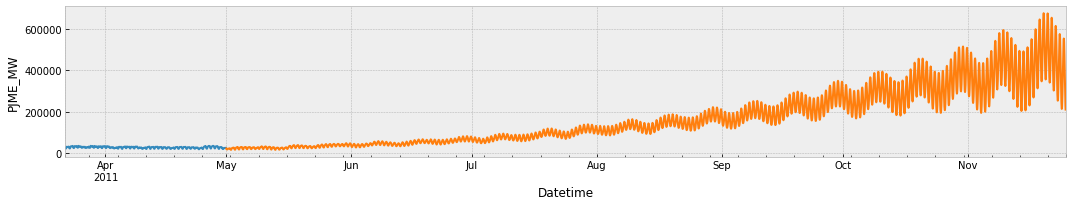

,Datetime,PJME_MW
0,2011-05-01 00:00:00,23895.922815
1,2011-05-01 01:00:00,22080.821202
2,2011-05-01 02:00:00,20718.088206
3,2011-05-01 03:00:00,19797.096544
4,2011-05-01 04:00:00,19252.344844


In [19]:
forecast, scores = model.predict(
    Ridge, 
    seasonality = True, 
    lag = True, 
    plot = True
)
forecast.head()